# Лабораторная работа 2

## Полносвязная нейронная сеть

Реализовать нейронную сеть, состоящую из двух полносвязных слоев и решающую задачу классификации на наборе данных из лабораторной работы 1.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scripts.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

1. Добавьте реализации методов класса TwoLayerNet . Проверьте вашу реализацию на модельных данных (Код приведен ниже).  

In [3]:
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Прямой проход: вычисление выхода сети

Реализуйте первую часть  метода TwoLayerNet.loss, вычисляющую оценки классов для входных данных. 

Сравните ваш выход сети с эталонными значениями. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-7) .

In [4]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()


print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08



# Прямой проход: вычисление loss

Реализуйте вторую часть метода, вычисляющую значение функции потерь. Сравните с эталоном. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-12) .

In [5]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Обратный проход

Реализуйте третью часть метода loss. Используйте численную реализацию расчета градиента для проверки вашей реализации обратного прохода.  Если прямой и обратный проходы реализованы верно, то ошибка будет < 1e-8 для каждой из переменных W1, W2, b1, и b2. 


In [5]:
from scripts.gradient_check import eval_numerical_gradient

loss, grads = net.loss(X, y, reg=0.05)

for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447646e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09


# Обучение нейронной сети на смоделированных данных

Реализуйте методы TwoLayerNet.train и TwoLayerNet.predict. Обучайте сеть до тех пор, пока значение loss не будет < 0.02.


Final training loss:  0.017143643532923816


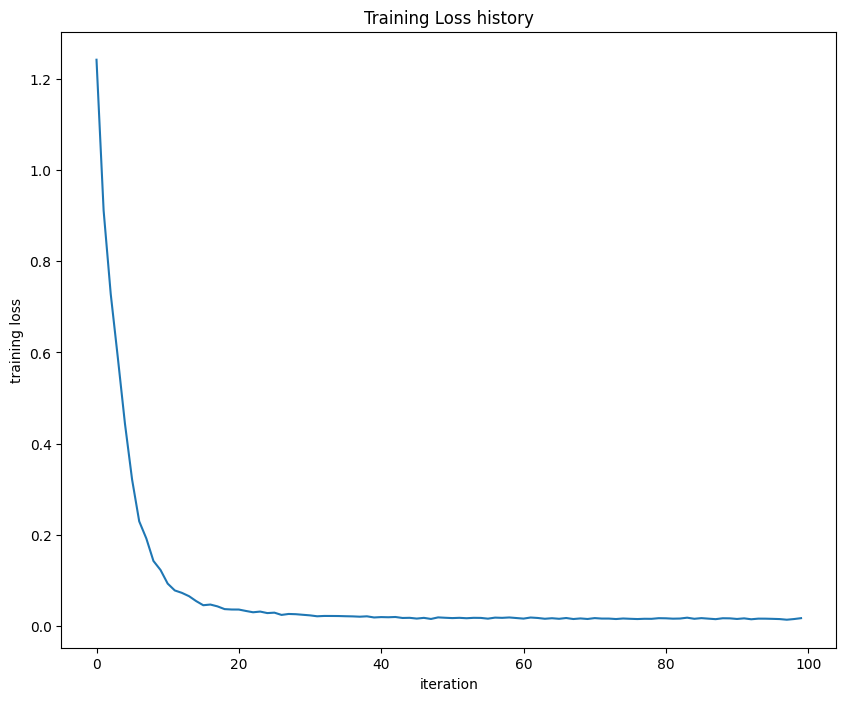

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])


plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Обучение нейронной сети на реальном наборе данных (CIFAR-10, MNIST)

Загрузите набор данных, соответствующий вашему варианту. 

Разделите данные на обучающую, тестовую и валидационную выборки.

Выполните предобработку данных, как в ЛР 1. 

Обучите нейронную сеть на ваших данных. 

При сдаче лабораторной работы объясните значения всех параметров метода train.

In [7]:
from scripts.data_utils import load_CIFAR10
import numpy as np
cifar10_dir = 'scripts/datasets/cifar-10-batches-py'

In [8]:
try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [9]:
train_sample_percentage = 90
test_sample_percentage = 50
validation_sample_percentage = 50
dev_sample_percentage = 100

num_train = (X_train.shape[0] * train_sample_percentage) // 100
num_test = (X_test.shape[0] * test_sample_percentage) // 100
num_val = ((X_test.shape[0] - num_test) * train_sample_percentage) // 100
num_dev = ((X_test.shape[0] - num_test - num_val)
           * dev_sample_percentage) // 100

X_train = X_train[:num_train].reshape(num_train, -1).astype(np.float64)
y_train = y_train[:num_train].reshape(num_train, )

X_test, X_validation, X_dev = X_test[:num_test], X_test[num_test:num_test +
                                                        num_val], X_test[num_test+num_val:num_test+num_val+num_dev]
y_test, y_validation, y_dev = y_test[:num_test], y_test[num_test:num_test +
                                                        num_val], y_test[num_test+num_val:num_test+num_val+num_dev]

X_test = X_test.reshape(num_test, -1).astype(np.float64)
X_validation = X_validation.reshape(num_val, -1).astype(np.float64)
X_dev = X_dev.reshape(num_dev, -1).astype(np.float64)
y_test = y_test.reshape(num_test, )
y_validation = y_validation.reshape(num_val, )
y_dev = y_dev.reshape(num_dev, )

print(f"Тренировочная выборка: X={X_train.shape}, y={y_train.shape}")
print(f"Валидационная выборка: X={X_validation.shape}, y={y_validation.shape}")
print(f"Тестовая выборка: X={X_test.shape}, y={y_test.shape}")
print(f"Dev выборка: X={X_dev.shape}, y={y_dev.shape}")

Тренировочная выборка: X=(45000, 3072), y=(45000,)
Валидационная выборка: X=(4500, 3072), y=(4500,)
Тестовая выборка: X=(5000, 3072), y=(5000,)
Dev выборка: X=(500, 3072), y=(500,)


In [17]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, 
            X_validation, y_validation,
            num_iters=3500, 
            batch_size=250,
            learning_rate=1e-3, 
            learning_rate_decay=0.95,
            reg=0.2, 
            verbose=True)

val_acc = (net.predict(X_validation) == y_validation).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 3500: loss 2.302701
iteration 100 / 3500: loss 2.182374
iteration 200 / 3500: loss 2.284903
iteration 300 / 3500: loss 2.016600
iteration 400 / 3500: loss 2.004057
iteration 500 / 3500: loss 1.898111
iteration 600 / 3500: loss 1.948934
iteration 700 / 3500: loss 1.933577
iteration 800 / 3500: loss 1.793529
iteration 900 / 3500: loss 1.936989
iteration 1000 / 3500: loss 1.932559
iteration 1100 / 3500: loss 1.781201
iteration 1200 / 3500: loss 1.815314
iteration 1300 / 3500: loss 1.950485
iteration 1400 / 3500: loss 1.921755
iteration 1500 / 3500: loss 1.727674
iteration 1600 / 3500: loss 1.825354
iteration 1700 / 3500: loss 1.777083
iteration 1800 / 3500: loss 1.890126
iteration 1900 / 3500: loss 1.697054
iteration 2000 / 3500: loss 1.867604
iteration 2100 / 3500: loss 1.711843
iteration 2200 / 3500: loss 1.761758
iteration 2300 / 3500: loss 1.697634
iteration 2400 / 3500: loss 1.799869
iteration 2500 / 3500: loss 1.681959
iteration 2600 / 3500: loss 1.785065
iteration 270

Используя параметры по умолчанию, вы можете получить accuracy, примерно равный 0.29. 

Проведите настройку гиперпараметров для увеличения accuracy. Поэкспериментируйте со значениями гиперпараметров, например, с количеством скрытых слоев, количеством эпох, скорости обучения и др. Ваша цель - максимально увеличить accuracy полносвязной сети на валидационном наборе. Различные эксперименты приветствуются. Например, вы можете использовать методы для сокращения размерности признакового пространства (например, PCA), добавить dropout слои и др. 

Для лучшей модели вычислите acсuracy на тестовом наборе. 

Для отладки процесса обучения часто помогают графики изменения loss и accuracy в процессе обучения. Ниже приведен код построения таких графиков. 

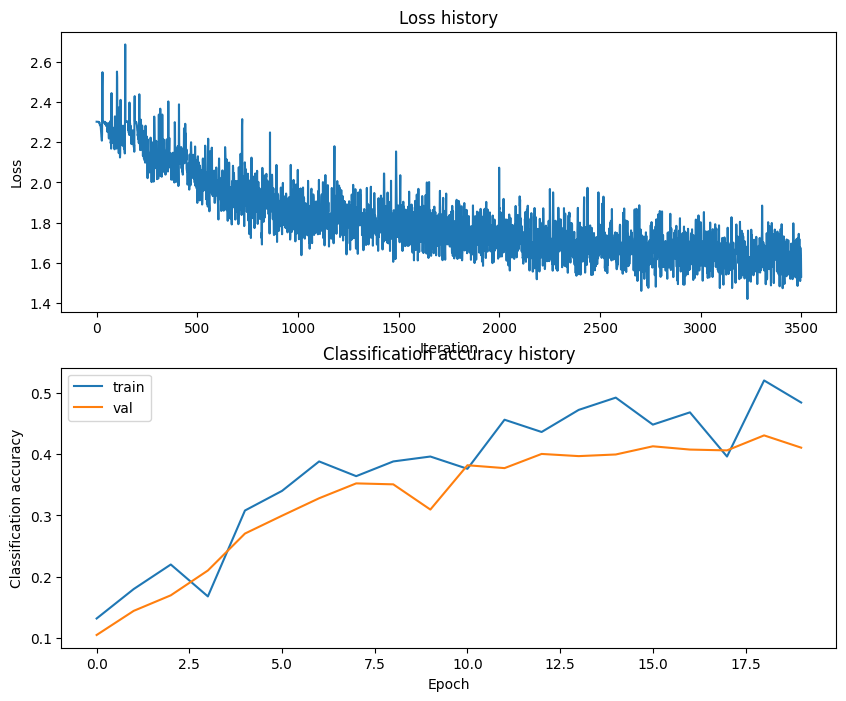

In [18]:
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

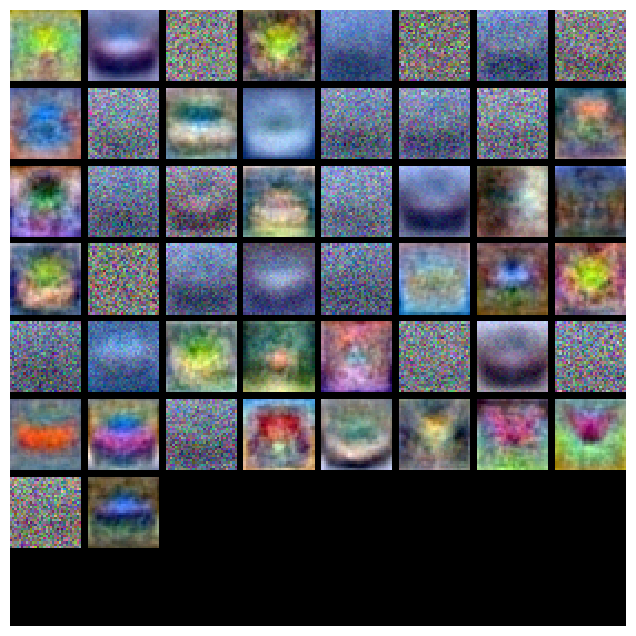

In [19]:
from scripts.vis_utils import visualize_grid

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

Сделайте выводы по результатам работы. 

Большая точность при обучении была достигнута при:

- увеличении количества эпох
- увеличении размера батча
- изменении параметра, указывающего на скорость обучения